In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file=(r'C:\Users\dell\Desktop\data sets\Online Retail.xlsx')
Data= pd.read_excel(file)
Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
Data.columns
Data.shape
Data.info()
Data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [3]:
Data.drop(['InvoiceNo','CustomerID'],inplace=True,axis=1)
Data.fillna('0',inplace=True)
#Data.isnull().sum()


In [92]:
Time=pd.to_datetime(Data['InvoiceDate'])


### from the above plot we can say that the highest number of purchases were made in month of November followed by the month of December and october.

In [91]:
Data['Month']=Data['InvoiceDate'].dt.month
Data['Dayofweek']=Data['InvoiceDate'].dt.dayofweek
monthly_sales=Data.groupby('Month')['Quantity'].sum()
monthly_sales

Month
1     308966
2     277989
3     351872
4     289098
5     380391
6     341623
7     391116
8     406199
9     549817
10    570532
11    740286
12    568561
Name: Quantity, dtype: int64

Text(0, 0.5, 'Total Sales')

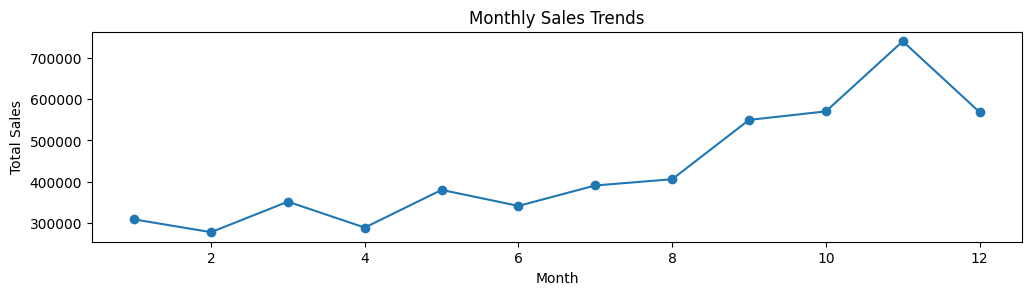

In [97]:
plt.figure(figsize=(12, 6))

# Plot monthly sales
plt.subplot(2, 1, 1)
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')

([<matplotlib.axis.XTick at 0x1e3898ca490>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

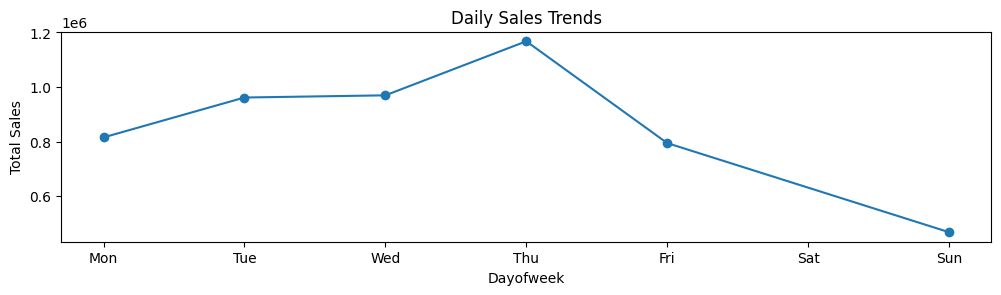

In [101]:
daily_sales=Data.groupby('Dayofweek')['Quantity'].sum()
plt.figure(figsize=(12, 6))

# Plot daily sales
plt.subplot(2, 1, 1)
daily_sales.plot(marker='o')
plt.title('Daily Sales Trends')
plt.xlabel('Dayofweek')
plt.ylabel('Total Sales')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

In [103]:
# Identify busiest months
busiest_months = monthly_sales.idxmax()

# Identify busiest days of the week
busiest_days = daily_sales.idxmax()

print(f"The busiest month in terms of sales is {busiest_months}.")
print(f"The busiest day of the week in terms of sales is {busiest_days}.")

The busiest month in terms of sales is 11.
The busiest day of the week in terms of sales is 3.


In [109]:
Top_countries=Data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
Bottom_countries=Data.groupby('Country')['Quantity'].sum().sort_values().head(10)


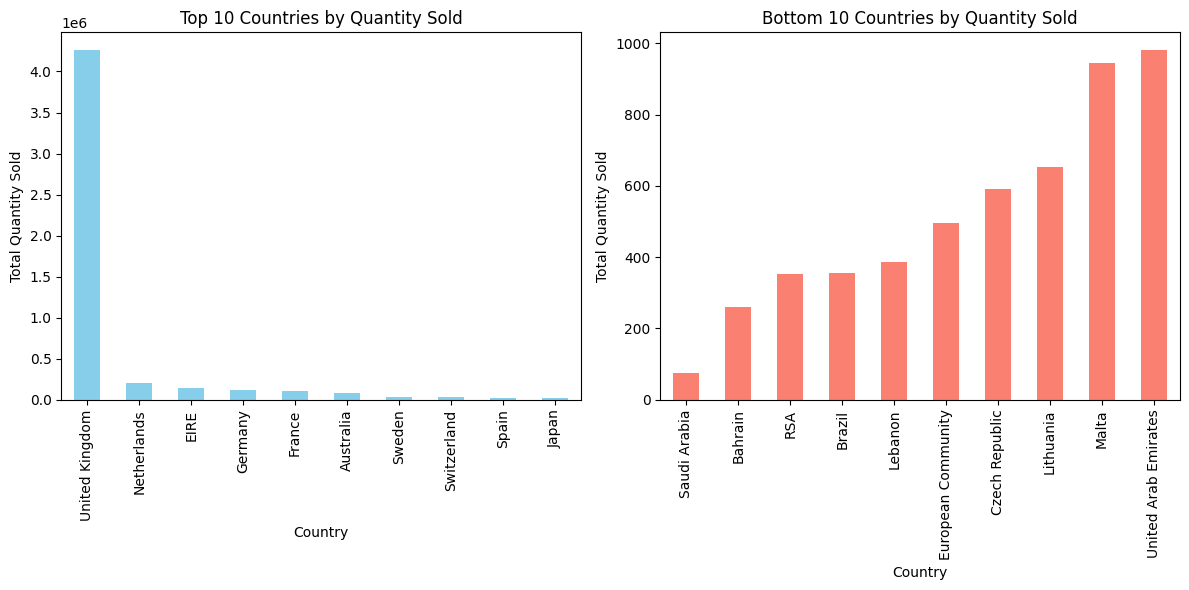

In [113]:

# Plot top countries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
Top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Quantity Sold')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')

# Plot bottom countries
plt.subplot(1, 2, 2)
Bottom_countries.plot(kind='bar', color='salmon')
plt.title('Bottom 10 Countries by Quantity Sold')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()


### The above Plot gives us the Idea of the quantity of the items sold It concludes that the most selling has been done in UK and the least in Saudi arabia.

In [118]:
## top selling products 
Data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1,JUMBO BAG RED RETROSPOT,47363
2,ASSORTED COLOUR BIRD ORNAMENT,36381
3,POPCORN HOLDER,36334
4,PACK OF 72 RETROSPOT CAKE CASES,36039
5,WHITE HANGING HEART T-LIGHT HOLDER,35317
6,RABBIT NIGHT LIGHT,30680
7,MINI PAINT SET VINTAGE,26437
8,PACK OF 12 LONDON TISSUES,26315
9,PACK OF 60 PINK PAISLEY CAKE CASES,24753


### The above data shows us the top 10 products sold 

## Conclusion 
### From teh above analysis of the data I conclude that the most product are sold in UK followed by the Netherlands and the least number of products are sold in Saudi Arabia.
### Also the most purchasing has been done in the month of November and on the day of Thursday 
### The most sold product is WORLD WAR 2 GLIDERS ASSTD DESIGNS  followed by JUMBO BAG RED RETROSPOT.